Imports

In [ ]:
! pip install numpy 
! pip install qiskit
! pip install matplotlib

In [7]:
from qiskit import QuantumCircuit, Aer ,BasicAer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

Making an arbitary state

In [3]:
alpha = 0.5
beta = 0.5j
normalization_factor = np.sqrt(abs(alpha**2)+ abs(beta**2))
special_state = np.array([alpha, beta]) / normalization_factor

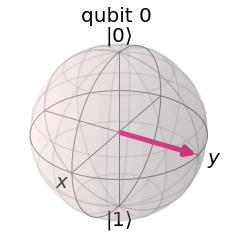

In [4]:
plot_bloch_multivector(special_state)

The circuit for teleportation

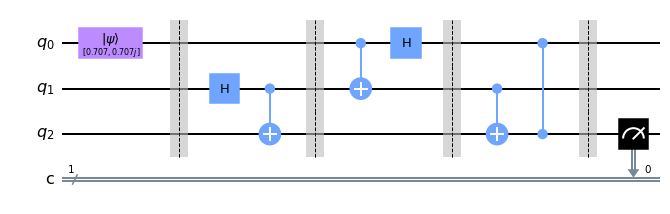

In [5]:
teleportation_circuit = QuantumCircuit(3, 1)

# Initializing the special state
teleportation_circuit.initialize(special_state,0)

teleportation_circuit.barrier()

# Entanger circuit
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

teleportation_circuit.barrier()

# Dis-Entanger circuit
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

teleportation_circuit.barrier()

# Controlled note gates based on Alice's Results
teleportation_circuit.cx(1,2)
teleportation_circuit.cz(0,2)

teleportation_circuit.barrier()

# Measuing Bob's Qubit
teleportation_circuit.measure(2,0)


teleportation_circuit.draw('mpl')

Measuring Bob's qubit in the Zeeman basis and comapring with the special state

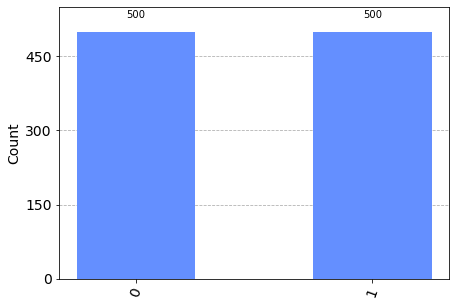

In [22]:
shots_fired = 1000

backend=Aer.get_backend('qasm_simulator')
result = execute(teleportation_circuit,backend, shots = shots_fired).result()

plot_histogram(result.get_counts())

In [21]:
print(" Probability(0) =", abs((alpha/normalization_factor)**2))
print(" Probability(1) =", abs((beta/normalization_factor)**2))

 Probability(0) = 0.4999999999999999
 Probability(1) = 0.4999999999999999


Calling and Running on a Real quantum computer

In [23]:
from qiskit import IBMQ
IBMQ.save_account('Add the IBM token here', overwrite=True)
provider=IBMQ.load_account()
backend=provider.get_backend('ibm_nairobi')

ibmqfactory.load_account:WARNING:2023-02-22 09:08:56,881: Credentials are already in use. The existing account in the session will be replaced.


In [25]:
from qiskit.tools import job_monitor

job = execute(teleportation_circuit, backend=backend, shots=shots_fired)
counts=job.result().get_counts()
job_monitor(job)

Job Status: job has successfully run


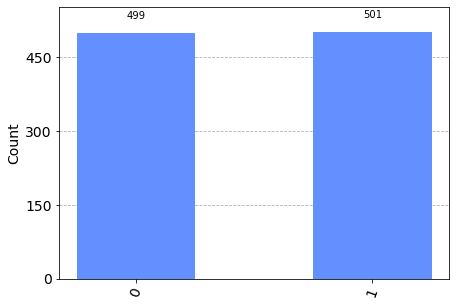

In [26]:
plot_histogram(counts)